In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mppi import InputFiles as I, Calculators as C, Datasets as D

In [2]:
omp = 1
mpi_run = 'mpirun -np 8'

# Optical absorption spectrum in the IP approximantion

In [56]:
code = C.YamboCalculator(omp=omp,mpi_run=mpi_run,executable='yambo',suffix='eps_q1_ip',skip=False)

Initialize a Yambo calculator with command OMP_NUM_THREADS=1 mpirun -np 8 yambo
Suffix for post_processing :  eps_q1_ip


In [57]:
yambo = D.Dataset(label='optics',run_dir='abs_spectrum_ip',pre_processing='yambo')

In [58]:
source = 'nscf/bnds_40-kpoints_8.save'
yambo.pre_processing_function(source_dir=source)

SAVE folder already present in abs_spectrum_ip


In [59]:
yambo_in = I.YamboIn('yambo -o c',folder=yambo.run_dir)

In [60]:
idd = 'asborption_ip'
yambo_in['LongDrXd'] = [1.00,1.00,1.00] # electric field
yambo_in['BndsRnXd'] = [1,10] # bands considered
yambo_in['QpntsRXd'] = [1,1] # momentum transfer
yambo_in['DmRngeXd'] = [[0.1,0.2],'eV'] # damping range
yambo_in['EnRngeXd'] = [[0,8],'eV'] # energy range
yambo_in['XfnQP_E'] = [1.00,1.00,1.00] # scissor
yambo.append_run(id=idd,calculator=code,input=yambo_in)

In [61]:
print(yambo_in)

chi
optics
X_Threads = 0.000000e+00 
DIP_Threads = 0.000000e+00 
NGsBlkXd = 1.000000 RL
ETStpsXd = 100.000000 
Chimod =       'IP'
% QpntsRXd
 1 | 1 |   
%
% BndsRnXd
 1 | 10 |   
%
% EnRngeXd
 0 | 8 |  eV 
%
% DmRngeXd
 0.1 | 0.2 |  eV 
%
% LongDrXd
 1.0 | 1.0 | 1.0 |   
%
% XfnQP_E
 1.0 | 1.0 | 1.0 |   
%



In [62]:
yambo.run()

delete folder : abs_spectrum_ip/asborption_ip
execute : cd abs_spectrum_ip ; OMP_NUM_THREADS=1 mpirun -np 8 yambo -F asborption_ip.in -J asborption_ip -C asborption_ip
parse file : abs_spectrum_ip/asborption_ip/o-asborption_ip.eps_q1_ip


In [66]:
res = yambo.results[0]
res.getAttributes()

dict_keys(['E', 'Im', 'Re'])

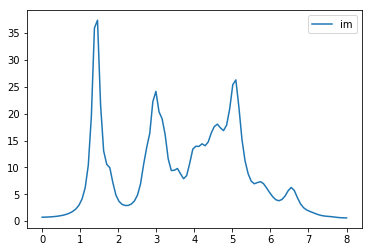

In [65]:
plt.plot(res.E,res.Im,label='im')
#plt.plot(res.E,res.Re,label='re')
plt.legend()
plt.show()

we find peaks at 1.4, 3 and 5 eV